In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For reading stock data from yahoo
import pandas_datareader as web

# For time stamps
from datetime import datetime

import warnings
import itertools

# For Visualization

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline

# For sharp and contrast graph plotting

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# The S&P 500 will be used for this analysis
ticker = ['^GSPC']

# To Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 40,end.month,end.day)

    
df = web.DataReader('^GSPC','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1979-09-17,110.059998,108.400002,108.760002,108.839996,37610000,108.839996
1979-09-18,109.000000,107.320000,108.839996,108.000000,38750000,108.000000
1979-09-19,109.019997,107.519997,108.000000,108.279999,35370000,108.279999
1979-09-20,110.690002,107.589996,108.279999,110.510002,45100000,110.510002
1979-09-21,111.580002,109.459999,110.510002,110.470001,52380000,110.470001


# Saving te file as CSV:

In [4]:
df.to_csv('stock.csv')

# Reading the csv file:

stock = pd.read_csv('df.csv', parse_dates=True)
stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1986-03-13,0.101562,0.088542,0.088542,0.097222,1.031789e+09,0.062761
1,1986-03-14,0.102431,0.097222,0.097222,0.100694,3.081600e+08,0.065003
2,1986-03-17,0.103299,0.100694,0.100694,0.102431,1.331712e+08,0.066124
3,1986-03-18,0.103299,0.098958,0.102431,0.099826,6.776640e+07,0.064443
4,1986-03-19,0.100694,0.097222,0.099826,0.098090,4.789440e+07,0.063322


# Only selecting the relevent data:

In [5]:
stock['Date'] = pd.to_datetime(stock['Date'])
ds_stock = stock[["Date", "Adj Close"]]
ds_stock.head()

,Date,Adj Close
0,1986-03-13,0.062761
1,1986-03-14,0.065003
2,1986-03-17,0.066124
3,1986-03-18,0.064443
4,1986-03-19,0.063322


# Indexing the data according to time series

In [6]:
ds = ds_stock.set_index('Date')
ds.index

DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '2019-08-28', '2019-08-29', '2019-08-30', '2019-09-03',
               '2019-09-04', '2019-09-05', '2019-09-06', '2019-09-09',
               '2019-09-10', '2019-09-11'],
              dtype='datetime64[ns]', name='Date', length=8444, freq=None)

Since we want to divide the data set into different timeframes. And working with current DateTime data can be tricky, therefore we will use the average of daily "Adj Close" price for a particular month of a year and the start of each month corresponding to the time stamp.

In [8]:
y = ds['Adj Close'].resample('MS').mean()
y['2018':].head()

Date
2018-01-01    87.549235
2018-02-01    89.028846
2018-03-01    90.718006
2018-04-01    91.026307
2018-05-01    94.911478
Freq: MS, Name: Adj Close, dtype: float64

# Check the link to set the Recession timeframe:

https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States

# Dividing the dataset into Recession timeframe

In [9]:
NR1 = y[:'1990-05']

# Early 1990s recession in the United States:

R1 = y['1990-06':'1991-03']

NR2 = y['1991-04':'2001-02']

# Early 2000s recession:

R2 = y['2001-03':'2001-11']

NR3 = y['2001-12':'2007-11']

# Great Recession:

R3 = y['2007-12':'2009-06']

NR4 = y['2009-07':]

# Visualizing S&P Monthly average "Adj Close" price time series data

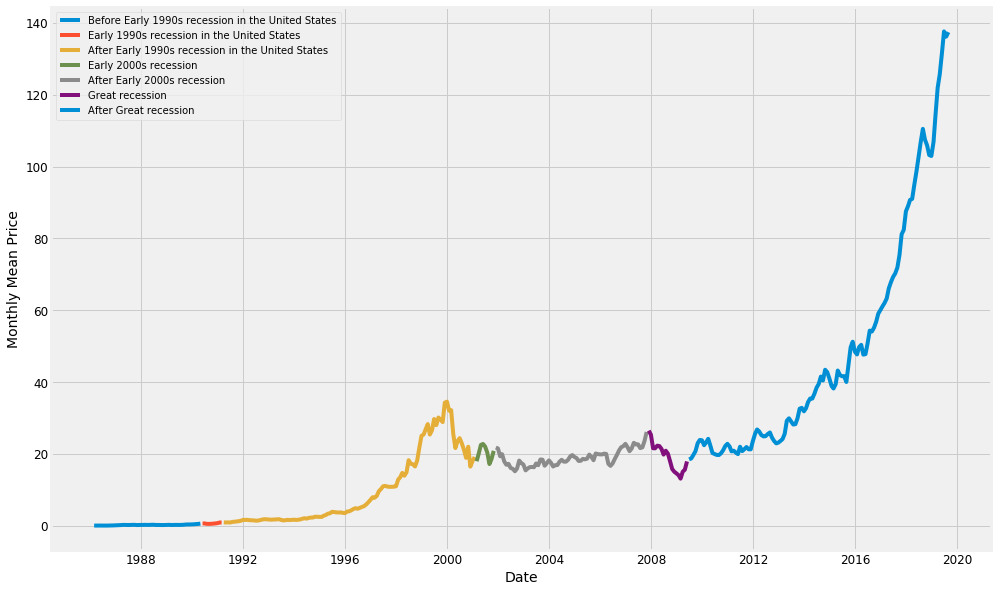

In [10]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(NR1,label='Before Early 1990s recession in the United States')
plt.plot(R1, label='Early 1990s recession in the United States')
plt.plot(NR2,label='After Early 1990s recession in the United States')
plt.plot(R2, label='Early 2000s recession')
plt.plot(NR3,label='After Early 2000s recession')
plt.plot(R3, label='Great recession')
plt.plot(NR4, label='After Great recession')
plt.ylabel('Monthly Mean Price')
plt.xlabel('Date')
plt.legend(loc=2)